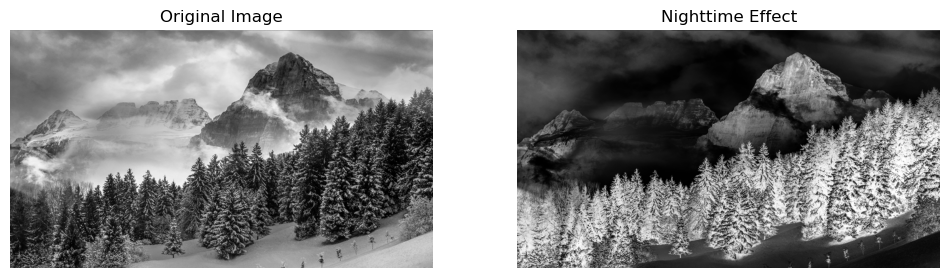

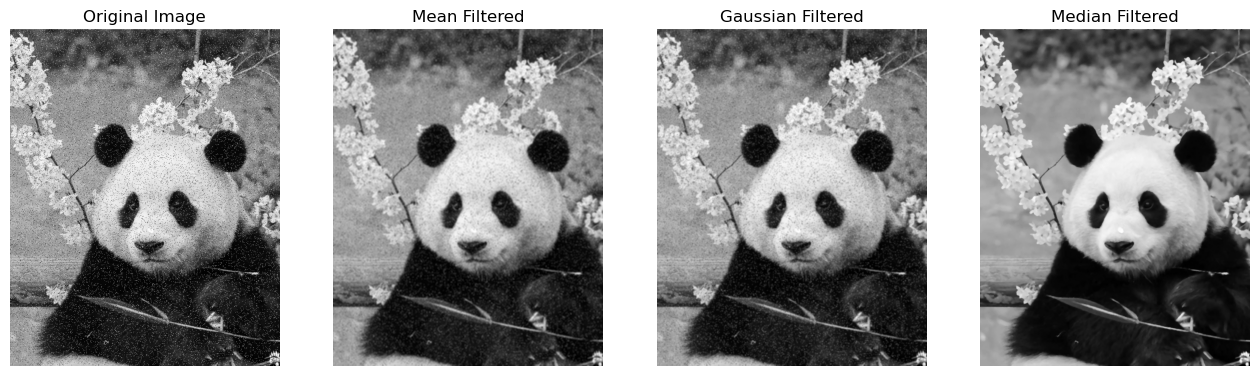

Analyzing the image of Task 2 reveals that the noise within the image is mostly black and white noise. Median filtering is most suitable for eliminating isolated intensity spikes(salt and pepper image noise), median filtering is best if small objects must be removed
In terms of others filters, uniform filter can reduces fluctuations due to disturbances in image acquisition, and Gaussian filtering is best if small objects must be retained 


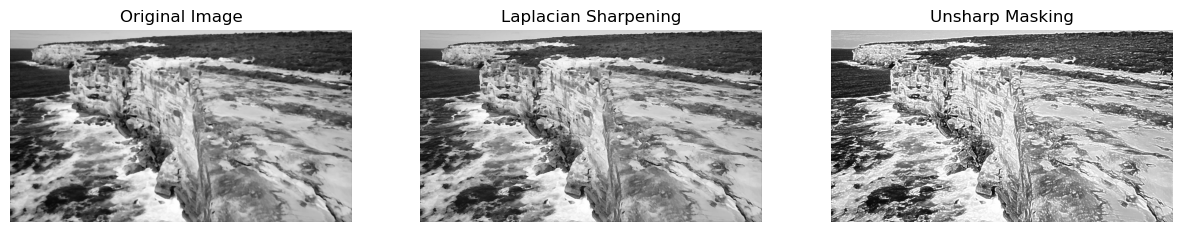

Unsharp masking is a better choice for sharpening blurred vacation pictures because it enhances edges while preserving natural textures. This method works by subtracting a blurred version of the image from the original, boosting high-frequency details without amplifying noise excessively.
In contrast, the Laplacian filter often introducing artifacts and noise, especially in images with smooth gradients like skies or water. 
Therefore, Laplacian sharping is more suitable for small objects and low resolution images, but there are larger object contours in the image, so unscharp masking is more suitable.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

class Assignment:

    def __init__(self, ImagePath):
        self.ImagePath = ImagePath

    def ShowPic(self, axes, index, Pic, PicName):
        axes[index].imshow(Pic, cmap='gray')  
        axes[index].set_title(str(PicName))
        axes[index].axis("off")

    def Task_1(self, image_path):
        self.ImagePath = image_path
        image = cv2.imread(self.ImagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # intensity inversion
        inverted_image = 255 - image
        # gamma correction
        gamma = 2.0
        gamma_corrected = np.array(255 * (inverted_image / 255) ** gamma, dtype=np.uint8)
        # show pictures
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        self.ShowPic(axes, 0, image, "Original Image")
        self.ShowPic(axes, 1, gamma_corrected, "Nighttime Effect")
        plt.show()

    def Task_2(self, image_path):
        self.ImagePath = image_path
        noisy_image = cv2.imread(self.ImagePath, cv2.IMREAD_GRAYSCALE)
        mean_filtered = cv2.blur(noisy_image, (5, 5))  # mean filtering
        gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), 1.5)  # gaussian filtering
        median_filtered = cv2.medianBlur(noisy_image, 5)  # median filtering
        fig, axes = plt.subplots(1, 4, figsize=(16, 6))
        self.ShowPic(axes, 0, noisy_image, "Original Image")
        self.ShowPic(axes, 1, mean_filtered, "Mean Filtered")
        self.ShowPic(axes, 2, gaussian_filtered, "Gaussian Filtered")
        self.ShowPic(axes, 3, median_filtered, "Median Filtered")
        plt.show()
        
    def Task_3(self, image_path):
        self.ImagePath = image_path
        image = cv2.imread(self.ImagePath, cv2.IMREAD_GRAYSCALE)
        # Method1: Laplacian Filter
        laplacian = cv2.Laplacian(image, cv2.CV_64F)
        sharpened_laplacian = cv2.convertScaleAbs(image - 1.0 * laplacian)
        # Method2：Unsharp Masking
        gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 5)  # gaussian filtering
        detail = cv2.subtract(image,gaussian_blurred)  # get details which needs improve
        unsharp_mask = cv2.addWeighted(image, 1, detail, 13, 0)  # improve details
        # show pictures
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        self.ShowPic(axes, 0, image, "Original Image")
        self.ShowPic(axes, 1, sharpened_laplacian, "Laplacian Sharpening")
        self.ShowPic(axes, 2, unsharp_mask, "Unsharp Masking")
        plt.show()

            
image_path1 = "./Task1.jpg"
image_path2 = "./Task2.jpg"
image_path3 = "./Task3.jpg"
Assignment1 = Assignment(image_path1)
Assignment1.Task_1(image_path1)
Assignment2 = Assignment(image_path2)
Assignment2.Task_2(image_path2)
print("Analyzing the image of Task 2 reveals that the noise within the image is mostly black and white noise. Median filtering is most suitable for eliminating isolated intensity spikes(salt and pepper image noise), median filtering is best if small objects must be removed")
print("In terms of others filters, uniform filter can reduces fluctuations due to disturbances in image acquisition, and Gaussian filtering is best if small objects must be retained ")
Assignment3 = Assignment(image_path3)
Assignment3.Task_3(image_path3)
print("Unsharp masking is a better choice for sharpening blurred vacation pictures because it enhances edges while preserving natural textures. This method works by subtracting a blurred version of the image from the original, boosting high-frequency details without amplifying noise excessively.")
print("In contrast, the Laplacian filter often introducing artifacts and noise, especially in images with smooth gradients like skies or water. ")
print("Therefore, Laplacian sharping is more suitable for small objects and low resolution images, but there are larger object contours in the image, so unscharp masking is more suitable.")
